## Project - Bank Churn prediction

 
### In this project, we aim to predict the churn for a bank, i.e, given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?

### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 
### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modelingPoints 

### Distribution:
The points distribution for this case is as follows:
- 1. Read the dataset
- 2. Drop the columns which are unique for all users like IDs (5 points)
- 3. Distinguish the feature and target set (5 points)
- 4. Divide the data set into trainingand test sets (5 points)
- 5. Normalize the train and test data(10points)
- 6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)
- 7. Predict the results using 0.5 as a threshold (10points)
- 8. Print the Accuracy score and confusion matrix (5 points)

### Import Libraries

In [1]:
SEED=4

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys

In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
pd.set_option('max_rows',200)
pd.set_option('max_columns',None)

### Import dataset

In [8]:
INPUT_FILE = "bank.csv"
INPUT_DIR = "./"

In [9]:
def read_input(input_dir, input_file):
    
    df = pd.read_csv(os.path.join(input_dir, input_file))
    
    return df

In [10]:
df = read_input(INPUT_DIR, INPUT_FILE)

In [11]:
df.shape

(10000, 14)

### Sanity Check 1

In [12]:
def sanity_check_1(df):
    dtype = df.dtypes
    null = df.isnull().sum()
    unique = df.nunique()

    result_df = pd.concat([dtype, null, unique], axis=1)
    result_df.columns = ['dtype', 'null', 'unique']
    result_df['null_%'] = result_df['null'].values / len(df)
    
    
    return result_df.sort_values(by='dtype')

In [13]:
sanity_check_1(df)

,dtype,null,unique,null_%
RowNumber,int64,0,10000,0.0
CustomerId,int64,0,10000,0.0
CreditScore,int64,0,460,0.0
Age,int64,0,70,0.0
Tenure,int64,0,11,0.0
NumOfProducts,int64,0,4,0.0
HasCrCard,int64,0,2,0.0
IsActiveMember,int64,0,2,0.0
Exited,int64,0,2,0.0
Balance,float64,0,6382,0.0


In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [16]:

def sanity_processing(df):
    df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
    

In [17]:
sanity_processing(df)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
TARGET = 'Exited'

### Univariate Distribution

In [20]:
univariate_df = pd.concat([df.describe(percentiles=[i/10 for i in range(10)]).T, df.skew()], axis=1)
univariate_df.rename(columns={0:"skew"}, inplace=True)

In [21]:
univariate_df

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,max,skew
CreditScore,10000.0,650.528800,96.653299,350.00,350.00,521.00,566.000,598.700,627.000,652.000,678.000,704.000,735.000,778.000,850.00,-0.071607
Age,10000.0,38.921800,10.487806,18.00,18.00,27.00,31.000,33.000,35.000,37.000,40.000,42.000,46.000,53.000,92.00,1.011320
Tenure,10000.0,5.012800,2.892174,0.00,0.00,1.00,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.00,0.010991
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,0.00,0.000,0.000,73080.908,97198.540,110138.926,122029.870,133710.358,149244.792,250898.09,-0.141109
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.00,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000,4.00,0.745568
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,0.00,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00,-0.901812
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,0.00,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.00,-0.060437
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,11.58,20273.58,41050.736,60736.079,80238.340,100193.915,119710.038,139432.236,159836.726,179674.704,199992.48,0.002085
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.00,1.471611


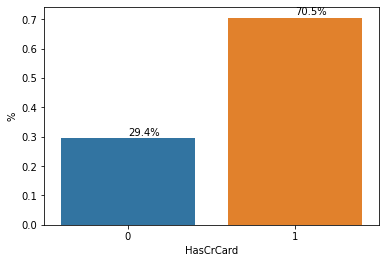

In [23]:
driver = 'HasCrCard'
_a = df[driver].value_counts(normalize=True).reset_index()
_a.columns = [driver, '%']
ax = sns.barplot(x=driver, y='%',data=_a)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+0.01
    ax.annotate(percentage, (x, y))
plt.show()

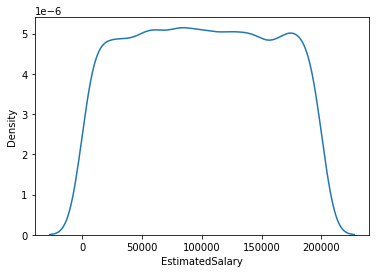

In [24]:
sns.distplot(df['EstimatedSalary'], hist=False)
plt.show()

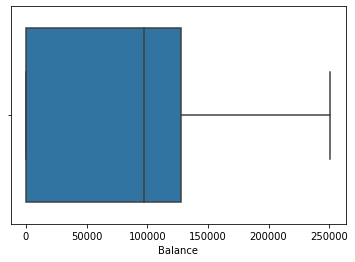

In [25]:
sns.boxplot(df['Balance'])
plt.show()

### Bivariate

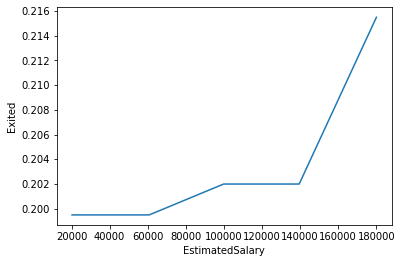

In [26]:
BUCKETS = 5
driver = 'EstimatedSalary'

df['b'] = pd.qcut(df[driver], q=BUCKETS, duplicates='drop')

grouped = df.groupby(by=['b'])[TARGET, driver].agg('mean')

sns.lineplot(x=driver,
            y=TARGET,
            data=grouped)
del df['b']
plt.show()

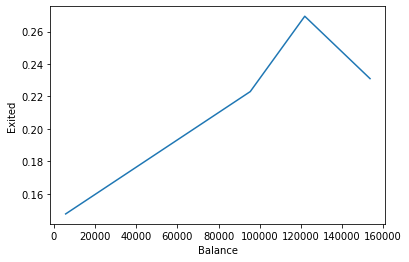

In [27]:
BUCKETS = 5
driver = 'Balance'

df['b'] = pd.qcut(df[driver], q=BUCKETS, duplicates='drop')

grouped = df.groupby(by=['b'])[TARGET, driver].agg('mean')

sns.lineplot(x=driver,
            y=TARGET,
            data=grouped)
del df['b']
plt.show()

In [28]:
driver='HasCrCard'
data_crosstab = pd.crosstab(df[driver],  
                            df[TARGET], 
                                margins = False,
                           normalize='index')
data_crosstab

Exited,0,1
HasCrCard,,
0,0.791851,0.208149
1,0.798157,0.201843


In [29]:
driver='IsActiveMember'
data_crosstab = pd.crosstab(df[driver],  
                            df[TARGET], 
                                margins = False,
                           normalize='index')
data_crosstab

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


### Data Preparation

In [30]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
X = df.drop(columns=[TARGET])
y = df[TARGET]

In [33]:
X.shape

(10000, 10)

In [34]:
label_X_gender_encoder = LabelEncoder()
X['Gender'] = label_X_gender_encoder.fit_transform(X['Gender'])

In [35]:
label_X_gender_encoder.classes_

array(['Female', 'Male'], dtype=object)

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [37]:
label_X_country_encoder = LabelEncoder()
temp_1 = label_X_country_encoder.fit_transform(X['Geography'])

In [38]:
label_X_country_encoder.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [ ]:
label_X_country_encoder.inverse_transform([0,1,2])

In [39]:
countryhotencoder = ColumnTransformer([("countries", OneHotEncoder(drop='first'), ['Geography'])],
                                      remainder="passthrough")
X = countryhotencoder.fit_transform(X)

In [41]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [42]:
X_train.shape, X_validation.shape, y_validation.shape

((8000, 11), (2000, 11), (2000,))

### Data Normalization

In [43]:
#Makes training faster
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)


### Fitting ANN

In [44]:
import tensorflow as tf
import tensorflow.keras.layers as L

### Model Architecture

In [45]:
features = 11

In [57]:
model = tf.keras.models.Sequential(
                                [L.Dense(32, activation='relu', input_shape = (features,), name='dense_8_tanh'),
                                  L.Dense(16, activation='relu',name='dense_4_tanh'),
                                  L.Dense(1, activation='sigmoid', name='dense_1_sigmoid')])


In [47]:
(11*32 + 32) + (32*16 + 16) + (16*1 + 1)

929

### Check model architecture

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8_tanh (Dense)         (None, 32)                384       
_________________________________________________________________
dense_4_tanh (Dense)         (None, 16)                528       
_________________________________________________________________
dense_1_sigmoid (Dense)      (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


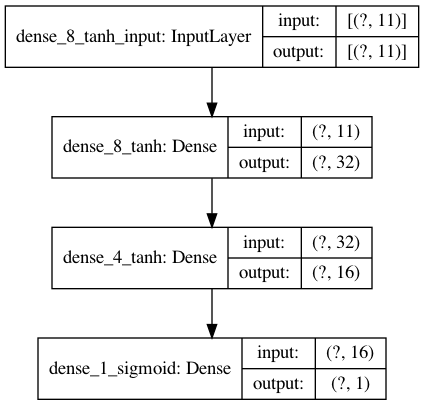

In [49]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
)

### Optimizer

In [58]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)
#optimizer = tf.keras.optimizers.SGD(lr = 0.001)

### Loss function

In [59]:
loss = tf.keras.losses.BinaryCrossentropy()

### Compile

In [60]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

### Training

### Checking model performance

In [53]:

history = model.fit(X_train,
          y_train,
          batch_size=256, 
          epochs=100,
          verbose = 1,
         validation_data=(X_validation, y_validation))


Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 0s 62us/sample - loss: 0.5203 - accuracy: 0.7926 - val_loss: 0.4810 - val_accuracy: 0.8020
Epoch 2/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4652 - accuracy: 0.7949 - val_loss: 0.4505 - val_accuracy: 0.8020
Epoch 3/100
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4432 - accuracy: 0.7950 - val_loss: 0.4339 - val_accuracy: 0.8025
Epoch 4/100
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4303 - accuracy: 0.7969 - val_loss: 0.4222 - val_accuracy: 0.8100
Epoch 5/100
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4207 - accuracy: 0.8066 - val_loss: 0.4129 - val_accuracy: 0.8205
Epoch 6/100
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4119 - accuracy: 0.8195 - val_loss: 0.4028 - val_accuracy: 0.8315
Epoch 7/100
8000/8000 [==============================] - 0s 7us/samp

8000/8000 [==============================] - 0s 6us/sample - loss: 0.3252 - accuracy: 0.8650 - val_loss: 0.3253 - val_accuracy: 0.8670
Epoch 57/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3250 - accuracy: 0.8656 - val_loss: 0.3255 - val_accuracy: 0.8675
Epoch 58/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3248 - accuracy: 0.8646 - val_loss: 0.3251 - val_accuracy: 0.8680
Epoch 59/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3240 - accuracy: 0.8651 - val_loss: 0.3251 - val_accuracy: 0.8695
Epoch 60/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3243 - accuracy: 0.8655 - val_loss: 0.3243 - val_accuracy: 0.8680
Epoch 61/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3239 - accuracy: 0.8652 - val_loss: 0.3256 - val_accuracy: 0.8700
Epoch 62/100
8000/8000 [==============================] - 0s 6us/sample - loss: 0.3234 - accuracy: 0.8659 - val_loss: 0.3241 

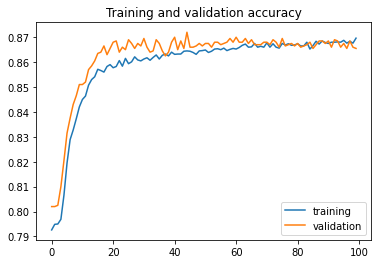

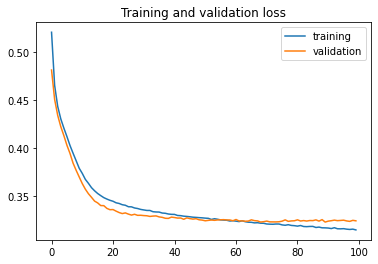

In [54]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()

### Callbacks

In [56]:
"./training3/cp-{epoch:04d}.ckpt".format(epoch=2)

'./training3/cp-0002.ckpt'

In [61]:
checkpoint_path = "./training3/cp-{epoch:04d}.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,)

model.fit(X_train,
          y_train,
          batch_size=256,
          epochs=100,
          verbose = 1,
         validation_data=(X_validation, y_validation),
         callbacks=[model_checkpoint_callback])

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
 256/8000 [..............................] - ETA: 8s - loss: 0.7685 - accuracy: 0.4141WARNING:tensorflow:From /Users/vinodgattani/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./training3/cp-0001.ckpt/assets
8000/8000 [==============================] - 1s 96us/sample - loss: 0.6681 - accuracy: 0.6100 - val_loss: 0.5564 - val_accuracy: 0.7940
Epoch 2/100
8000/8000 [==============================] - 0s 46us/sample - loss: 0.5232 - accuracy: 0.7933 - val_loss: 0.4830 - val_accuracy: 0.8020
Epoch 3/100
8000/8000 [==============================] - 0s 46us/sample - loss: 0.4768 - accuracy: 0.7949 - val_loss: 0.45

Epoch 27/100
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3379 - accuracy: 0.8608 - val_loss: 0.3318 - val_accuracy: 0.8690
Epoch 28/100
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3373 - accuracy: 0.8597 - val_loss: 0.3307 - val_accuracy: 0.8690
Epoch 29/100
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3364 - accuracy: 0.8605 - val_loss: 0.3297 - val_accuracy: 0.8660
Epoch 30/100
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3353 - accuracy: 0.8608 - val_loss: 0.3299 - val_accuracy: 0.8700
Epoch 31/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3346 - accuracy: 0.8614 - val_loss: 0.3292 - val_accuracy: 0.8670
Epoch 32/100
8000/8000 [==============================] - 0s 45us/sample - loss: 0.3341 - accuracy: 0.8629 - val_loss: 0.3295 - val_accuracy: 0.8665
Epoch 33/100
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3333 - accuracy: 0.8614

8000/8000 [==============================] - 0s 55us/sample - loss: 0.3234 - accuracy: 0.8651 - val_loss: 0.3272 - val_accuracy: 0.8670
Epoch 55/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3227 - accuracy: 0.8649 - val_loss: 0.3268 - val_accuracy: 0.8655
Epoch 56/100
8000/8000 [==============================] - 0s 56us/sample - loss: 0.3229 - accuracy: 0.8643 - val_loss: 0.3269 - val_accuracy: 0.8665
Epoch 57/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3221 - accuracy: 0.8651 - val_loss: 0.3272 - val_accuracy: 0.8675
Epoch 58/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.3217 - accuracy: 0.8645 - val_loss: 0.3272 - val_accuracy: 0.8665
Epoch 59/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3213 - accuracy: 0.8658 - val_loss: 0.3271 - val_accuracy: 0.8660
Epoch 60/100
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3212 - accuracy: 0.8645 - val_loss: 

8000/8000 [==============================] - 0s 49us/sample - loss: 0.3146 - accuracy: 0.8681 - val_loss: 0.3269 - val_accuracy: 0.8640
Epoch 82/100
8000/8000 [==============================] - 0s 56us/sample - loss: 0.3145 - accuracy: 0.8673 - val_loss: 0.3281 - val_accuracy: 0.8650
Epoch 83/100
8000/8000 [==============================] - 1s 70us/sample - loss: 0.3143 - accuracy: 0.8661 - val_loss: 0.3271 - val_accuracy: 0.8640
Epoch 84/100
8000/8000 [==============================] - 0s 54us/sample - loss: 0.3140 - accuracy: 0.8680 - val_loss: 0.3286 - val_accuracy: 0.8665
Epoch 85/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.3140 - accuracy: 0.8681 - val_loss: 0.3280 - val_accuracy: 0.8660
Epoch 86/100
8000/8000 [==============================] - 0s 52us/sample - loss: 0.3137 - accuracy: 0.8685 - val_loss: 0.3280 - val_accuracy: 0.8685
Epoch 87/100
8000/8000 [==============================] - 0s 46us/sample - loss: 0.3129 - accuracy: 0.8676 - val_loss: 

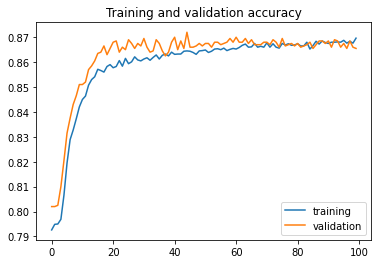

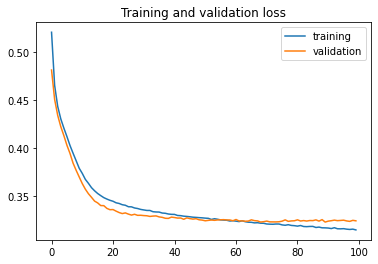

In [62]:

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()

In [63]:
"./training3/cp-{epoch:04d}.ckpt".format(epoch=60)

'./training3/cp-0060.ckpt'

In [64]:
new_model = tf.keras.models.load_model("./training3/cp-{epoch:04d}.ckpt".format(epoch=60))

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8_tanh (Dense)         (None, 32)                384       
_________________________________________________________________
dense_4_tanh (Dense)         (None, 16)                528       
_________________________________________________________________
dense_1_sigmoid (Dense)      (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [66]:
loss, acc = new_model.evaluate(X_validation,  y_validation, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

2000/2000 [==============================] - 0s 134us/sample - loss: 0.3279 - accuracy: 0.8675
Restored model, accuracy: 86.75%


In [68]:
new_model.save('./churn_model_v01')

INFO:tensorflow:Assets written to: ./churn_model_v01/assets


In [69]:
reloaded_model = tf.keras.models.load_model('./churn_model_v01')

In [70]:
loss, acc = reloaded_model.evaluate(X_validation,
                                    y_validation,
                                    verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

2000/2000 [==============================] - 0s 62us/sample - loss: 0.3279 - accuracy: 0.8675
Restored model, accuracy: 86.75%


### Model evaluation

In [71]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [72]:
y_train_prob=new_model.predict(X_train)
y_validation_prob=new_model.predict(X_validation)

In [73]:
y_train_prob[0:5]

array([[0.10072759],
       [0.06375992],
       [0.34823367],
       [0.00764902],
       [0.26151052]], dtype=float32)

In [74]:
def evaluation_metrics(threshold):
    

    
    y_train_pred = y_train_prob >= threshold
    y_validation_pred=y_validation_prob >= threshold
    
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_train, y_train_pred)
    cm = confusion_matrix(y_train, y_train_pred)
    
    print(f"Train Precision: {precision:.2%}")
    print(f"Train Recall: {recall:.2%}")
    print(f"Train Accuracy: {accuracy:.2%}")
    print(f"Train Confusion Matrix: {cm}")
    
    print("\n\n\n")
    precision = precision_score(y_validation, y_validation_pred)
    recall = recall_score(y_validation, y_validation_pred)
    accuracy = accuracy_score(y_validation, y_validation_pred)
    cm = confusion_matrix(y_validation, y_validation_pred)
    
    print(f"Validation Precision: {precision:.2%}")
    print(f"Validation Recall: {recall:.2%}")
    print(f"Validation Accuracy: {accuracy:.2%}")
    print(f"Validation Confusion Matrix: {cm}")

In [75]:
evaluation_metrics(0.5)

Train Precision: 76.65%
Train Recall: 49.42%
Train Accuracy: 86.54%
Train Confusion Matrix: [[6112  247]
 [ 830  811]]




Validation Precision: 73.65%
Validation Recall: 51.52%
Validation Accuracy: 86.75%
Validation Confusion Matrix: [[1531   73]
 [ 192  204]]


In [76]:
evaluation_metrics(0.8)

Train Precision: 93.12%
Train Recall: 27.24%
Train Accuracy: 84.66%
Train Confusion Matrix: [[6326   33]
 [1194  447]]




Validation Precision: 94.87%
Validation Recall: 28.03%
Validation Accuracy: 85.45%
Validation Confusion Matrix: [[1598    6]
 [ 285  111]]


In [77]:
evaluation_metrics(0.2)

Train Precision: 49.16%
Train Recall: 80.13%
Train Accuracy: 78.92%
Train Confusion Matrix: [[4999 1360]
 [ 326 1315]]




Validation Precision: 47.68%
Validation Recall: 80.30%
Validation Accuracy: 78.65%
Validation Confusion Matrix: [[1255  349]
 [  78  318]]


##### Number of Layers:

##### Activation:
input layer: relu becasue we are in an input layer. uses the ReLu activation function for  ϕ
output layer: sigmoid becasue we are in an output layer. uses the Sigmoid activation function for  ϕ . This is used instead of the ReLu function becasue it generates probabilities for the outcome. We want the probability that each customer leaves the bank.

##### Type of optimization / backpropagation technique to use: 
We will use Adam. Adam is a very efficeint variation of Stochastic Gradient Descent. For Adam and its variant, learning rate or the decay rate does not really matter too much.

##### Learning Rate:
default learning rate 0.001.

##### Number of Neurons in a layer:
We will keep it 6 as per our initial calculation above.


##### Loss:
loss: binary_crossentropy This is the loss function used within adam. This should be the logarthmic loss. If our dependent (output variable) is Binary, it is binary_crossentropy. If Categorical, then it is called categorical_crossentropy

Rebuilding the model using these optimised parameters